# Exploratory Data analysis - EDA

In [68]:
# importing the required libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [69]:
#changing the location to read the file
import os 
os.getcwd()

'C:\\Users\\Jeeva46\\Desktop\\GIT'

In [70]:
os.chdir("C:\\Users\\Jeeva46\\Desktop\\GIT")

In [71]:
# loading the file to df
df = pd.read_csv('laptop_price.csv', encoding='latin-1')
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [72]:
df.shape

(1303, 13)

* knowing the dimensions of data 
* 1303 samples and 13 features

In [73]:
df.duplicated().sum()


0

* No duplicates where found

In [74]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

* No null values are present in dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


* Getting info on the datatypes of the features

In [76]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,NaN,NaN,NaN,660.155794,381.172104,1.0,331.5,659.0,990.5,1320.0
Company,1303,19,Dell,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1303,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1303.0,NaN,NaN,NaN,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1303,40,Full HD 1920x1080,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,1303,9,8GB,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,1303,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,1303,110,Intel HD Graphics 620,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

* Reading the unique values 
* This helps to know the countinuous variable and discrete variables
* Later we can use to enoding

In [78]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

* Dropping the unwanted features present in dataset
* These two feature are reduntant to analyse the price

# Feature Engineering


## Data visualization & feature engineering

### Company column

The no of unique companies:  19


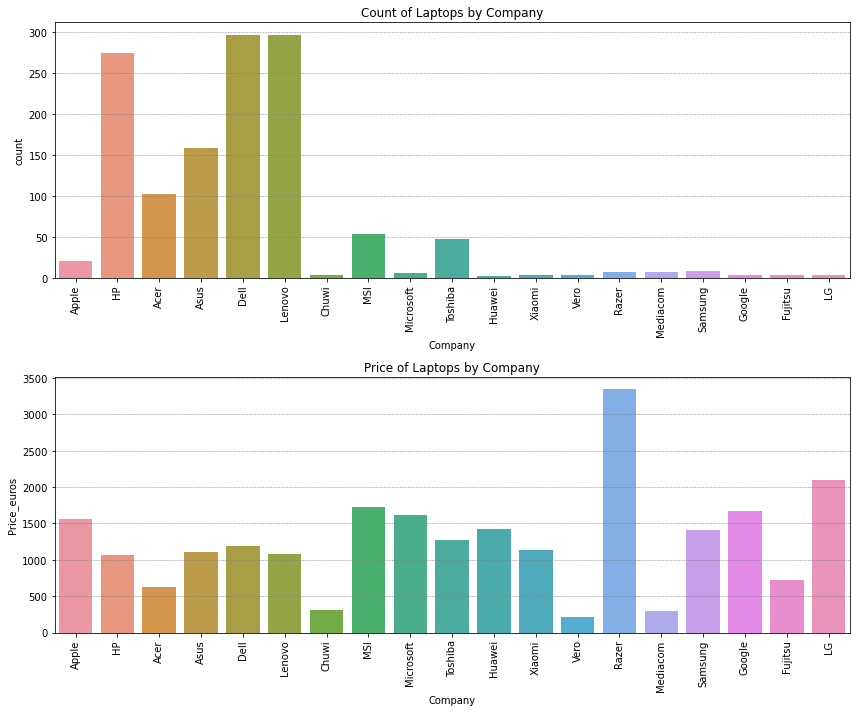

In [79]:
# Create a figure with a specified size
plt.figure(figsize=(12, 10))

print('The no of unique companies: ',df['Company'].nunique())

# First subplot: Countplot
plt.subplot(2, 1, 1) # 1st subplot
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title('Count of Laptops by Company')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5) # grids would be good to guess the approx values

# Second subplot: Barplot
plt.subplot(2, 1, 2)  # 2nd subplot
sns.barplot(x='Company', y='Price_euros', data=df,ci=None)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title('Price of Laptops by Company')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)


plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### TypeName column

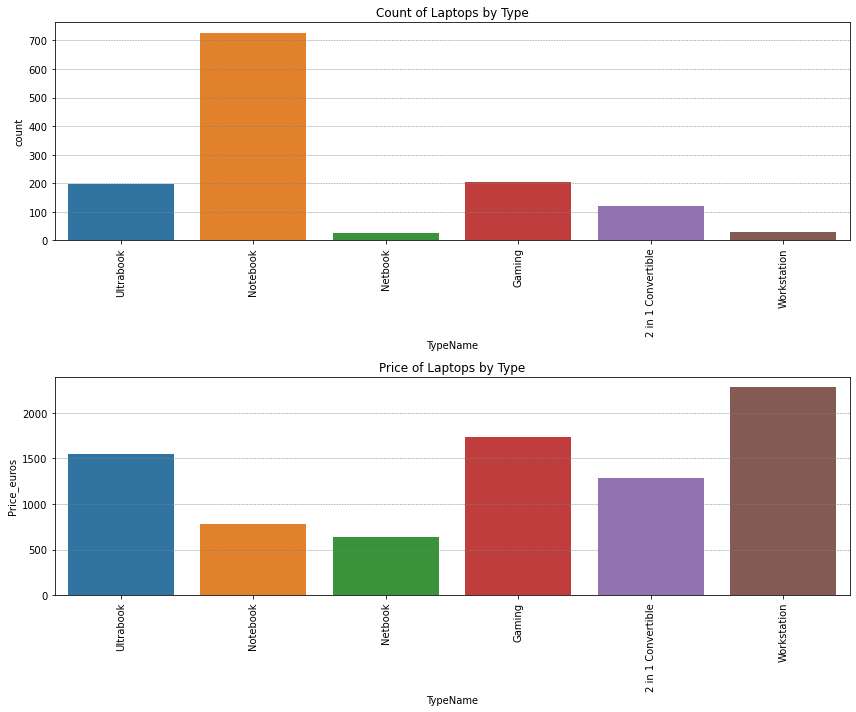

In [80]:

plt.figure(figsize=(12, 10))

# First subplot: Countplot
plt.subplot(2, 1, 1) # 1st subplot
sns.countplot(x='TypeName', data=df)
plt.xticks(rotation=90)  
plt.title('Count of Laptops by Type')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Barplot
plt.subplot(2, 1, 2) # 2nd subplot
sns.barplot(x='TypeName', y='Price_euros', data=df,ci=None)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title('Price of Laptops by Type')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)


plt.tight_layout() 
plt.show()

### Inches column

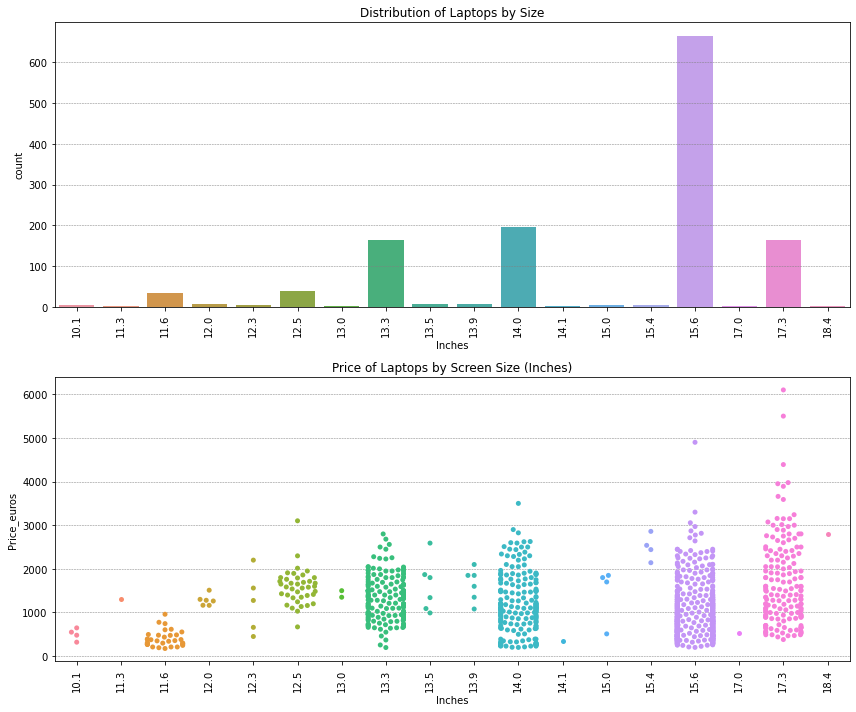

In [81]:

plt.figure(figsize=(12, 10))

# First subplot: Countplot
plt.subplot(2, 1, 1) 
sns.countplot(x='Inches', data=df)
plt.xticks(rotation=90)  
plt.title('Distribution of Laptops by Size')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Scatter plot
plt.subplot(2, 1, 2)  
sns.swarmplot(x='Inches', y='Price_euros', data=df)
plt.xticks(rotation=90) 
plt.title('Price of Laptops by Screen Size (Inches)')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  


plt.tight_layout()  
plt.show()

### Operating System OS

In [82]:
print(df['OpSys'].value_counts())

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64


* We can group the different categories of values 
* Windows OS is distributed as more than one
* same like mac
* we can secregate to smaller bins

In [83]:
opsys = {
    'No OS': 'OS', # For null OS imputing OS
    'Android' : 'Android',
    'Chrome OS': 'Chrome',
    'Linux' : 'Linux',
    'Windows 10':'Windows',
    'Windows 7':'Windows',
    'Windows 10 S':'Windows',
    'Windows S':'Windows',
    'macOS':'Mac',
    'Mac OS X':'Mac'
}

for old_word,new_word in opsys.items():
    df['OpSys'] = df['OpSys'].str.replace(old_word,new_word)



print(df['OpSys'].value_counts())

Windows    1125
OS           66
Linux        62
Chrome       27
Mac          21
Android       2
Name: OpSys, dtype: int64


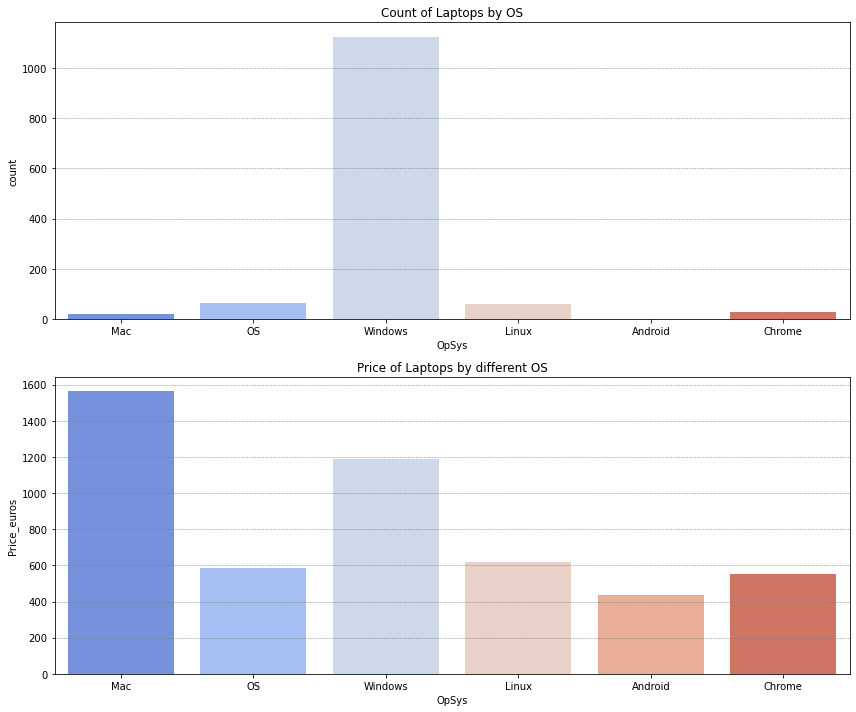

In [84]:

plt.figure(figsize=(12, 10))

# First subplot: Countplot
plt.subplot(2, 1, 1)  
sns.countplot(x='OpSys', data=df,palette='coolwarm')
plt.title('Count of Laptops by OS')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Bar plot
plt.subplot(2, 1, 2)  
sns.barplot(x='OpSys', y='Price_euros', data=df,palette='coolwarm',ci=None)
plt.title('Price of Laptops by different OS')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  


plt.tight_layout()  
plt.show()

* Its clear that count of windows laptop is greater than all the OS in big margin
* Mac OS price is greater compared to other OS laptops followed by windows with 1200 EU
* Below windows price drops to half of windows OS

### Weight

In [85]:
df['Weight'] = df['Weight'].str.replace("kg"," ")
df['Weight'] =  pd.to_numeric(df['Weight']) 

* Replacing the "kg" in weight with blank space
* Changing the dtype of weight column to numerical
* To further evaluate

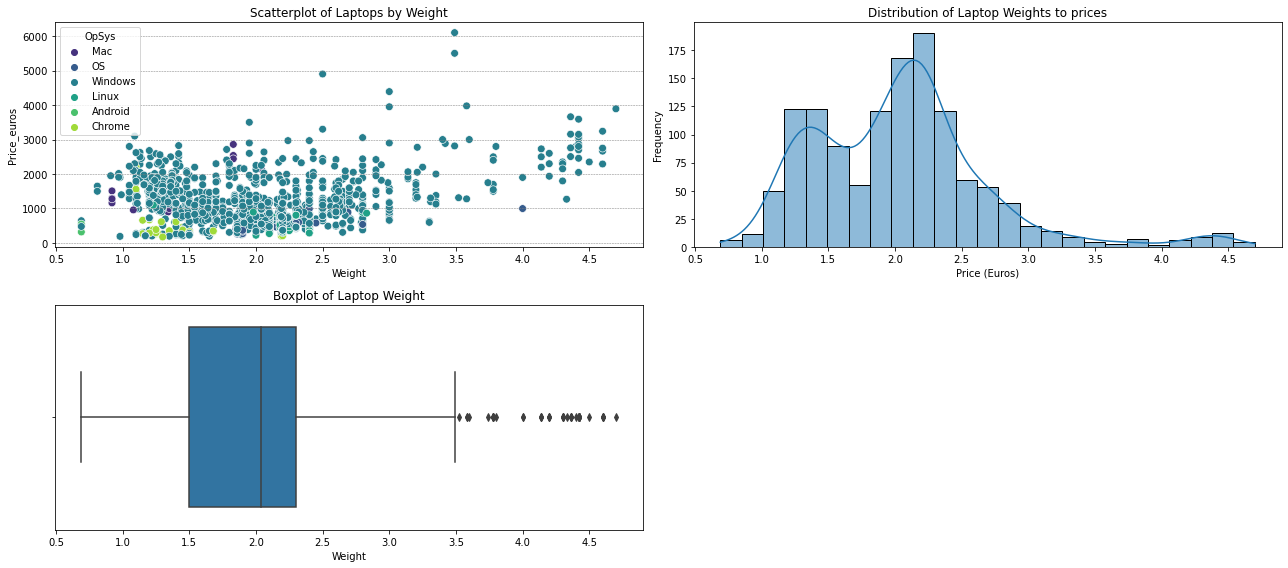

In [86]:

plt.figure(figsize=(18, 8))

# First subplot: Countplot
plt.subplot(2, 2, 1)  
sns.scatterplot(x='Weight',y= 'Price_euros',hue='OpSys' ,data=df,palette='viridis',s=60)
plt.title('Scatterplot of Laptops by Weight')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Histogram
plt.subplot(2, 2, 2)  
sns.histplot(x='Weight', data=df, bins=25,kde=True)
plt.title('Distribution of Laptop Weights to prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

# Third subplot : Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x='Weight', data=df)
plt.title('Boxplot of Laptop Weight')
plt.xlabel('Weight')


plt.tight_layout()  # Adjust the layout to prevent overlap
# Show the plot
plt.show()

* Windows laptop has occupied in large scale in weight variation
* windows laptops has products 0.7-4.2 kg of weight 
* most of the laptops fell between 1.1 to 2.5 kg .
* Median weight of laptop is 2.1kg 

### Price (euros)

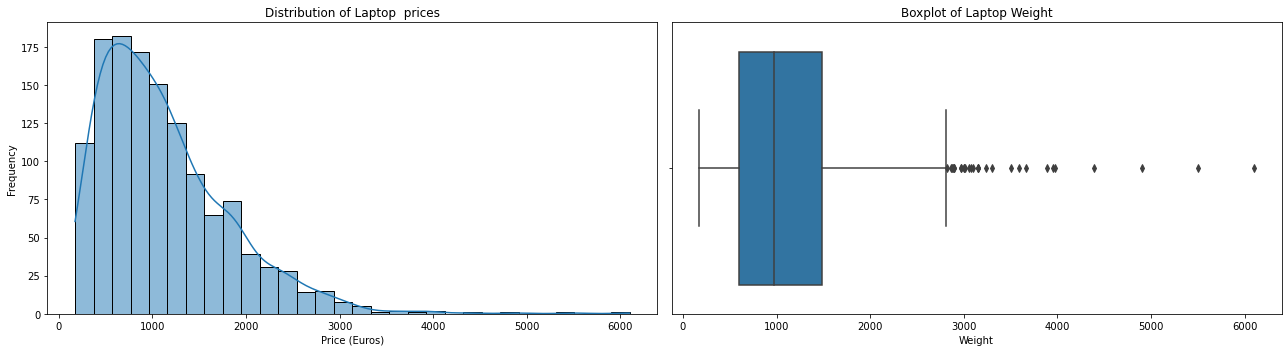

In [87]:
# Create a figure with a specified size
plt.figure(figsize=(18, 5))

# First subplot: Histogram
plt.subplot(1, 2, 1)  
sns.histplot(x='Price_euros', data=df, bins=30,kde=True)
plt.title('Distribution of Laptop  prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

# Second subplot : Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Price_euros', data=df)
plt.title('Boxplot of Laptop Weight')
plt.xlabel('Weight')


plt.tight_layout() 
plt.show()

* 600 to 1500 EU is covers the most of laptop price.
* Above 2900EU is considered as over priced laptops
* Price feature is right skewed 

### Ram Feature

In [88]:
df['Ram'] = df['Ram'].str.replace("GB"," ")
df['Ram'] =  pd.to_numeric(df['Ram']) 
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

* Replacing the 'GB' to blank 
* Changing the dtype to numerical

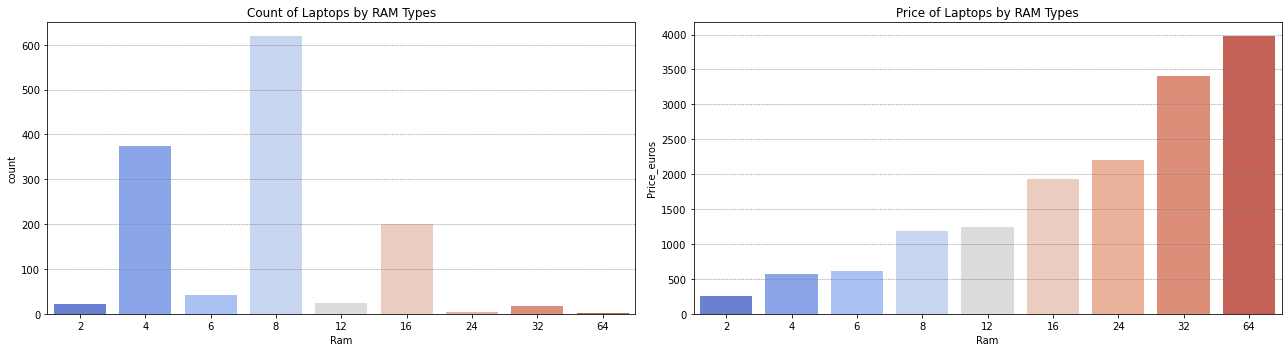

In [89]:

plt.figure(figsize=(18, 5))

# First subplot: Countplot
plt.subplot(1, 2, 1)  
sns.countplot(x='Ram', data=df,palette='coolwarm')
plt.title('Count of Laptops by RAM Types')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Bar plot
plt.subplot(1, 2, 2) 
sns.barplot(x='Ram', y='Price_euros', data=df,palette='coolwarm',ci=None)
plt.title('Price of Laptops by RAM Types')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Add gridlines


plt.tight_layout()  
plt.show()

* Over 600 laptops has 8GB RAM installed in their laptops
* Second most is the 4GB RAM installed in 380laptops
* Propotional to the RAM Type the price od laptops increases

### CPU Feature

In [90]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

* Every PC builders are PC enthusiast knows that 
* whether its high end or low end processor 
* Processor generation and frequency is most important than model.
* So we are separating the  frequencies mentioned in separate feature

In [91]:
df['Cpu_hertz'] = df['Cpu'].str.rsplit(' ', 1).str[1]
df['Cpu_hertz'] = df['Cpu_hertz'].str.replace('GHz'," ")
df['Cpu_hertz'] = pd.to_numeric(df['Cpu_hertz'])
df['Cpu_hertz']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu_hertz, Length: 1303, dtype: float64

* Separating and changing it to Numerical feature

In [92]:
df['Cpu_brand'] = df['Cpu'].str.split(' ',1).str[0]
df['Cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Cpu_brand, dtype: int64

In [93]:
df = df[~(df['Cpu_brand']=='Samsung')]

* Dropping the samsung processor and filter the cpu to two types

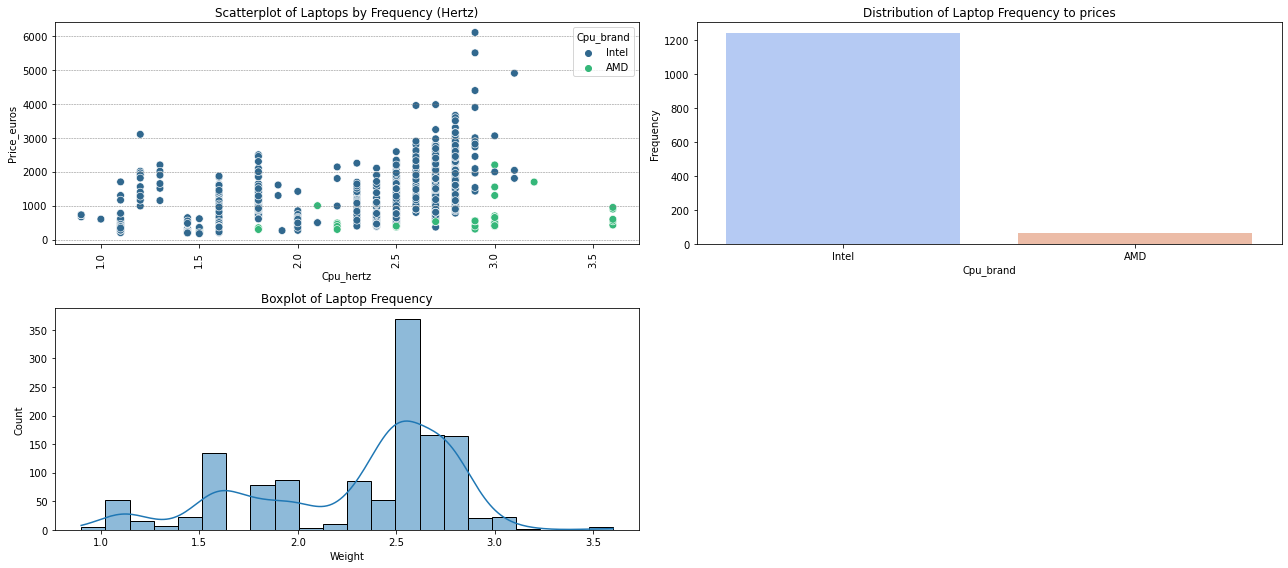

In [94]:

plt.figure(figsize=(18, 8))

# First subplot: Countplot
plt.subplot(2, 2, 1)  
sns.scatterplot(x='Cpu_hertz',y= 'Price_euros',hue='Cpu_brand' ,data=df,palette='viridis',s=60)
plt.xticks(rotation=90)  
plt.title('Scatterplot of Laptops by Frequency (Hertz)')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Histogram
plt.subplot(2, 2, 2)  
sns.countplot(x='Cpu_brand', data=df,palette='coolwarm')
plt.title('Distribution of Laptop Frequency to prices')
plt.ylabel('Frequency')

# Third subplot : Boxplot
plt.subplot(2, 2, 3)
sns.histplot(x='Cpu_hertz', data=df,kde=True)
plt.title('Boxplot of Laptop Frequency')
plt.xlabel('Weight')


plt.tight_layout() 
plt.show()

* Distribution of CPU processor is imbalanced 
* More than 90% of samples fell in intel variable
* 2.5 - 2.9 hertz has higher bin of laptops 

### Resolution - Display

In [95]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* This is to check the informations mentioned in screen resolution
* We can see the touch screen , IPS and resolution dimension would be usefull

In [96]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df['IPS_panel'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)

* Expanding the features to Touchscreen and IPS panels

In [97]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')

df[['Screen_width','Screen_heigth']] = df['ScreenResolution'].str.split('x',expand=True).astype(float)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_hertz,Cpu_brand,TouchScreen,IPS_panel,Screen_width,Screen_heigth
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,2.3,Intel,0,1,2560.0,1600.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,898.94,1.8,Intel,0,0,1440.0,900.0
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,OS,1.86,575.00,2.5,Intel,0,0,1920.0,1080.0
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,2537.45,2.7,Intel,0,1,2880.0,1800.0
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,3.1,Intel,0,1,2560.0,1600.0


* Extracting the screen resolution only

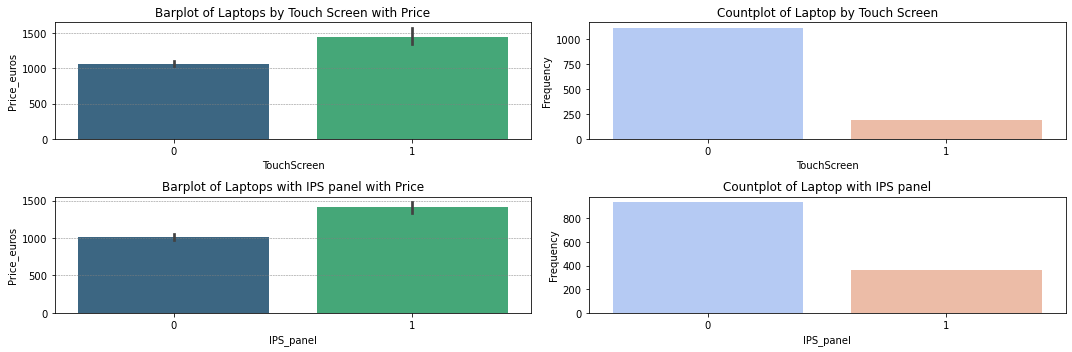

In [98]:

plt.figure(figsize=(15, 5))

# First subplot: Countplot
plt.subplot(2, 2, 1)  
sns.barplot(x='TouchScreen',y= 'Price_euros',data=df,palette='viridis')
plt.title('Barplot of Laptops by Touch Screen with Price')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Histogram
plt.subplot(2, 2, 2)  
sns.countplot(x='TouchScreen', data=df,palette='coolwarm')
plt.title('Countplot of Laptop by Touch Screen')
plt.ylabel('Frequency')

# Third subplot: Barplot
plt.subplot(2, 2, 3)  
sns.barplot(x='IPS_panel',y= 'Price_euros',data=df,palette='viridis')
plt.title('Barplot of Laptops with IPS panel with Price')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Fourth subplot: Countplot
plt.subplot(2, 2, 4)  
sns.countplot(x='IPS_panel', data=df,palette='coolwarm')
plt.title('Countplot of Laptop with IPS panel')
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

* Count of Touch screen is low but the cost of touch screen is higher
* Cost price of laptops with IPS panel is higher but count of laptops with IPS panel is 1/3rd.

In [99]:
df['PPI'] = (((df['Screen_width']**2+df['Screen_heigth']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_hertz,Cpu_brand,TouchScreen,IPS_panel,Screen_width,Screen_heigth,PPI
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,2.3,Intel,0,1,2560.0,1600.0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,898.94,1.8,Intel,0,0,1440.0,900.0,127.677940
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,OS,1.86,575.00,2.5,Intel,0,0,1920.0,1080.0,141.211998
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,2537.45,2.7,Intel,0,1,2880.0,1800.0,220.534624
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,3.1,Intel,0,1,2560.0,1600.0,226.983005


* To cut long story short screen height and width is creating multicoliniearity 
* To drop either one column is now use
* To utilize the screens resolution we can can calculate the PPI with resolution and size of laptop which we are having.

### Memory


In [100]:
import re

# Function to extract and clean SSD and HDD capacities
def split_storage(storage):
    parts = storage.split(' + ')
    ssd = None
    hdd = None
    
    for part in parts:
        if 'SSD' in part or 'Flash Storage' in part:
            ssd = part.strip()
        elif 'HDD' in part or 'Hybrid' in part:
            hdd = part.strip()
    
    return pd.Series([ssd, hdd])

# Apply the function to the Storage column
df[['SSD', 'HDD']] = df['Memory'].apply(split_storage)

# Define a regular expression pattern to remove unwanted text
pattern = r'[A-Za-z\s]+'

# Function to convert TB to GB and add 1000
def convert_to_gb(value):
    if pd.notna(value) and 'TB' in value:
        numeric_value = float(re.sub(pattern, '', value))
        return str(int(numeric_value * 1000))
    return value

# Apply the function to the SSD and HDD columns
df['SSD'] = df['SSD'].apply(convert_to_gb)
df['HDD'] = df['HDD'].apply(convert_to_gb)


# Apply the pattern to the SSD and HDD columns and clean up
df['SSD'] = df['SSD'].str.replace(pattern, '', regex=True).str.strip()
df['HDD'] = df['HDD'].str.replace(pattern, '', regex=True).str.strip()

df['SSD'] = df['SSD'].fillna(0)
df['HDD'] = df['HDD'].fillna(0)

# Print the resulting DataFrame
print(df)

     Company            TypeName  Inches ScreenResolution  \
0      Apple           Ultrabook    13.3        2560x1600   
1      Apple           Ultrabook    13.3         1440x900   
2         HP            Notebook    15.6        1920x1080   
3      Apple           Ultrabook    15.4        2880x1800   
4      Apple           Ultrabook    13.3        2560x1600   
...      ...                 ...     ...              ...   
1298  Lenovo  2 in 1 Convertible    14.0        1920x1080   
1299  Lenovo  2 in 1 Convertible    13.3        3200x1800   
1300  Lenovo            Notebook    14.0         1366x768   
1301      HP            Notebook    15.6         1366x768   
1302    Asus            Notebook    15.6         1366x768   

                                       Cpu  Ram               Memory  \
0                     Intel Core i5 2.3GHz    8            128GB SSD   
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8    

* Separating the SSD and HDD to New features
* imputing 0 were its null

### GPU

In [101]:
df['Gpu'] = df['Gpu'].str.split(' ', 1).str[0]

df = df[~df['Gpu'].str.contains('ARM')]

df.Gpu.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

* Graphics distribution 


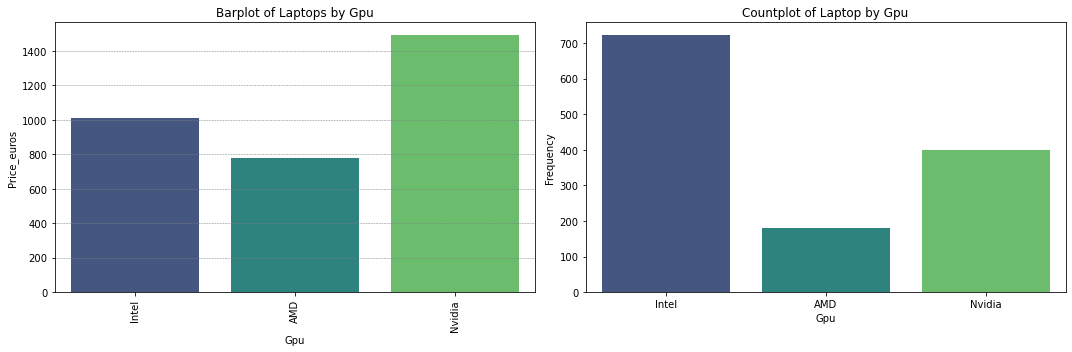

In [102]:
# Create a figure with a specified size
plt.figure(figsize=(15, 5))

# First subplot: Countplot
plt.subplot(1, 2, 1)  
sns.barplot(x='Gpu',y= 'Price_euros',data=df,palette='viridis',ci=None)
plt.xticks(rotation=90)  
plt.title('Barplot of Laptops by Gpu')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Second subplot: Histogram
plt.subplot(1, 2, 2)  
sns.countplot(x='Gpu', data=df,palette='viridis')
plt.title('Countplot of Laptop by Gpu')
plt.ylabel('Frequency')


plt.tight_layout()  # Adjust the layout to prevent overlap
# Show the plot
plt.show()


* Count of Intel graphics laptops is high 
* Price of Nvidia graphics is greater than Intel and has laptop count greater than AMD

# Encoding 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   int64  
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   float64
 10  Price_euros       1302 non-null   float64
 11  Cpu_hertz         1302 non-null   float64
 12  Cpu_brand         1302 non-null   object 
 13  TouchScreen       1302 non-null   int64  
 14  IPS_panel         1302 non-null   int64  
 15  Screen_width      1302 non-null   float64
 16  Screen_heigth     1302 non-null   float64


In [104]:
df.drop(columns=['ScreenResolution','Cpu','Memory','Screen_width','Screen_heigth'],axis=1,inplace=True)

* Dropping the reduntant features 
* Because we created clean features from that which we will use in machine learning

In [105]:
df['TypeName'] = df['TypeName'].str.replace('2 in 1 ',"")
df['SSD'] = df['SSD'].astype(float)
df['HDD'] = df['HDD'].astype(float)


* Changing the dtype to float 
* replacing numbers in Typename for encoding

In [106]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [107]:
# Create the 'intel' column
df['intel'] = df.apply(lambda row: 1 if row['Cpu_brand'] == 'Intel' and 'Intel' in row['Gpu'] else 0, axis=1)

# Create the 'AMD' column
df['AMD'] = df.apply(lambda row: 1 if row['Cpu_brand'] == 'AMD' and 'AMD' in row['Gpu'] else 0, axis=1)

* Creating feature with same processor and graphics installed to check the significance

In [108]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_hertz,Cpu_brand,TouchScreen,IPS_panel,PPI,SSD,HDD,intel,AMD
0,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,1339.69,2.3,Intel,0,1,226.983005,128.0,0.0,1,0
1,Apple,Ultrabook,13.3,8,Intel,Mac,1.34,898.94,1.8,Intel,0,0,127.677940,128.0,0.0,1,0
2,HP,Notebook,15.6,8,Intel,OS,1.86,575.00,2.5,Intel,0,0,141.211998,256.0,0.0,1,0
3,Apple,Ultrabook,15.4,16,AMD,Mac,1.83,2537.45,2.7,Intel,0,1,220.534624,512.0,0.0,0,0
4,Apple,Ultrabook,13.3,8,Intel,Mac,1.37,1803.60,3.1,Intel,0,1,226.983005,256.0,0.0,1,0


In [109]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int32  
 1   TypeName     1302 non-null   int32  
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int64  
 4   Gpu          1302 non-null   int32  
 5   OpSys        1302 non-null   int32  
 6   Weight       1302 non-null   float64
 7   Price_euros  1302 non-null   float64
 8   Cpu_hertz    1302 non-null   float64
 9   Cpu_brand    1302 non-null   int32  
 10  TouchScreen  1302 non-null   int64  
 11  IPS_panel    1302 non-null   int64  
 12  PPI          1302 non-null   float64
 13  SSD          1302 non-null   float64
 14  HDD          1302 non-null   float64
 15  intel        1302 non-null   int64  
 16  AMD          1302 non-null   int64  
dtypes: float64(7), int32(5), int64(5)
memory usage: 190.0 KB
None


* Automating a function to label encode feature for model

In [110]:
price_column = df.pop('Price_euros')  # Remove 'Salary' column
df.insert(16, 'Price_euros', price_column)

* Putting the price feature to one side for easy comparability

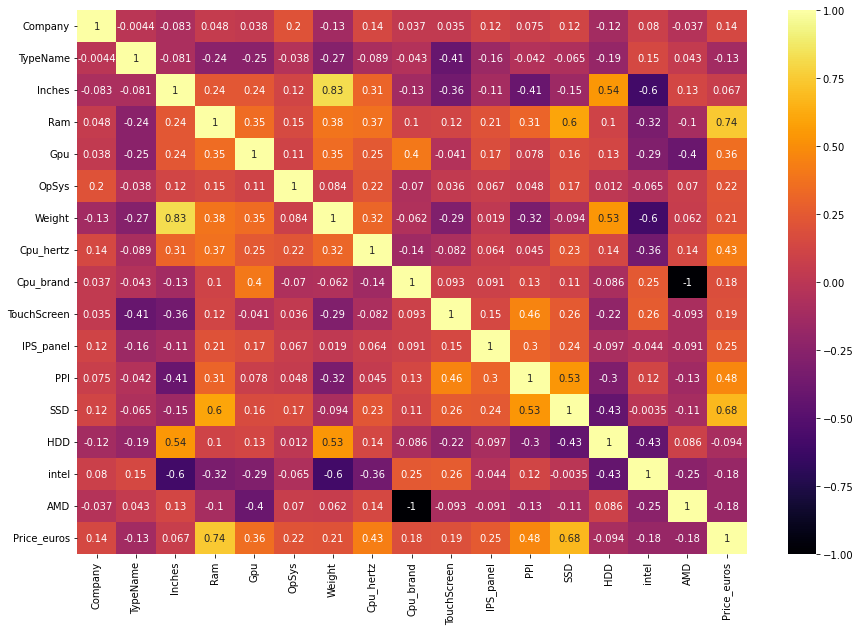

In [111]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='inferno')
plt.show()

In [112]:
df.drop(columns=['Inches','HDD','AMD','intel','TypeName','Weight'],inplace=True)

* Checking the Corelation and dropping the features which area reduntant or multicolinear

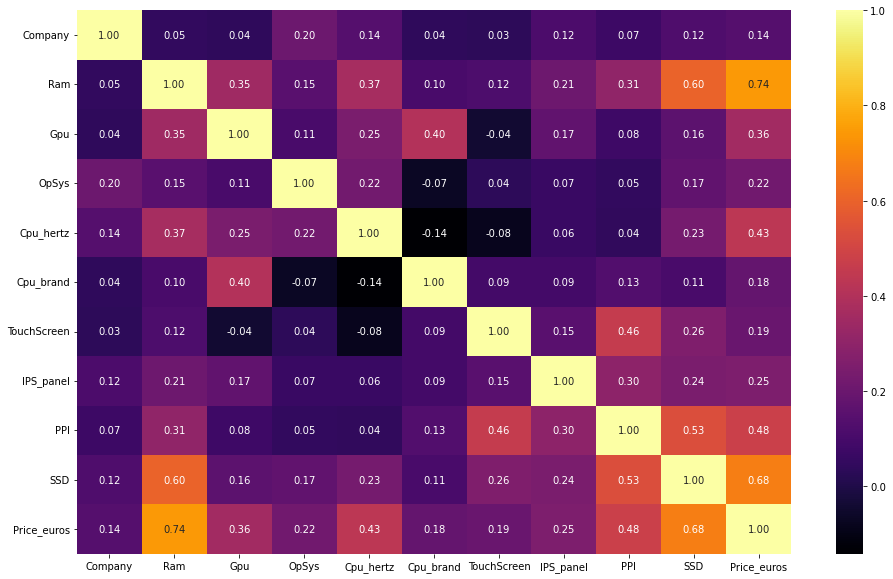

In [113]:
corr = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='inferno',fmt= ".2f")
plt.show()

* Features before modelling

# Machine learning model

### Data preprocessing

Separating datasets to independent and depandent ( Targert ) variable 

In [114]:
X = df.drop('Price_euros',axis=1)
y = np.log(df[['Price_euros']])

In [115]:
# Importing the libraries for train , test the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [116]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)

In [117]:
# Standardizing features
ss = StandardScaler()
X_train.loc[:,:]= ss.fit_transform(X_train.loc[:,:])
X_test.loc[:,:] = ss.transform(X_test.loc[:,:])

In [118]:
# Training Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

* Predicting the Target variable for train and test

In [119]:
y_train_pred = rfr.predict(X_train)

In [120]:
y_test_pred = rfr.predict(X_test)


* Getting the model score of test data

In [121]:
# Evaluating model
print(f"Model Score: {rfr.score(X_test, y_test)}")

Model Score: 0.8556323633303362


In [122]:
print('R2 score',metrics.r2_score(y_test,y_test_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))

R2 score 0.8556323633303362
MAE 0.1739171746557003


* R2 score and MAE shows that this model is a good fit 
* R2 score of 85.4% is good for predicting the laptop price

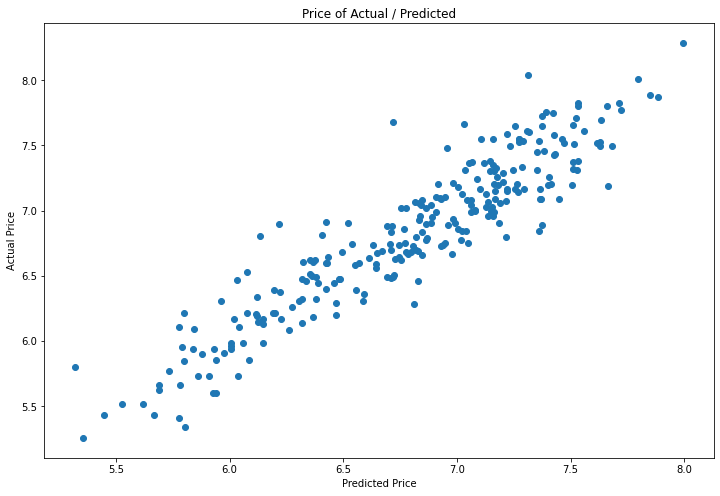

In [123]:
# Plotting predictions

plt.figure(figsize=(12, 8))
plt.scatter(y_test_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Price of Actual / Predicted')
plt.show()

* Visual representation of Y actual and Y prediction made from our own model 
* The linearity in graph shows that the model has Best fit line 